In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
bt=pd.read_csv('bank_transactions_data_2.csv')

In [3]:
bt.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [4]:
 bt.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [5]:
bt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
bt.shape

(2512, 16)

In [7]:
bt['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [8]:
bt['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [9]:
bt['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [10]:
bt['Channel'].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

CONVERT DATE COLUMNS TO DATETIME

In [11]:
bt['TransactionDate']=pd.to_datetime(bt['TransactionDate'])

In [12]:
bt['PreviousTransactionDate']=pd.to_datetime(bt['PreviousTransactionDate'])

In [13]:
bt.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [14]:
#Check for Duplicates
bt.duplicated().sum()

0

EXAMINATION OF INDIVIDUAL COLUMNS

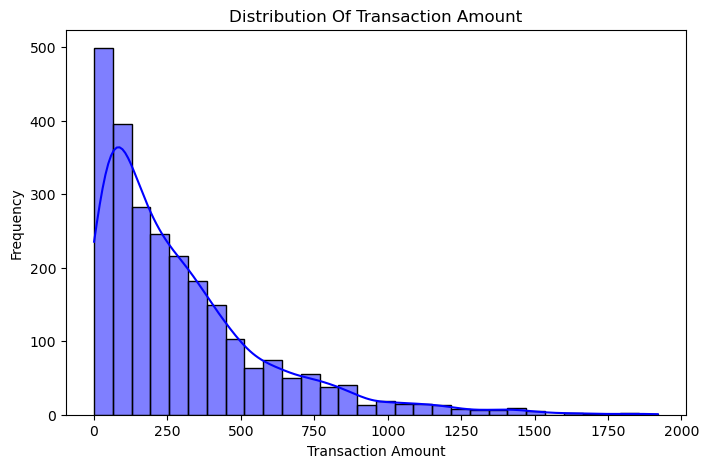

In [15]:
#Transaction Amount Distribution
plt.figure(figsize=(8,5))
sb.histplot(bt['TransactionAmount'], bins=30, kde=True, color='blue')
plt.title('Distribution Of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

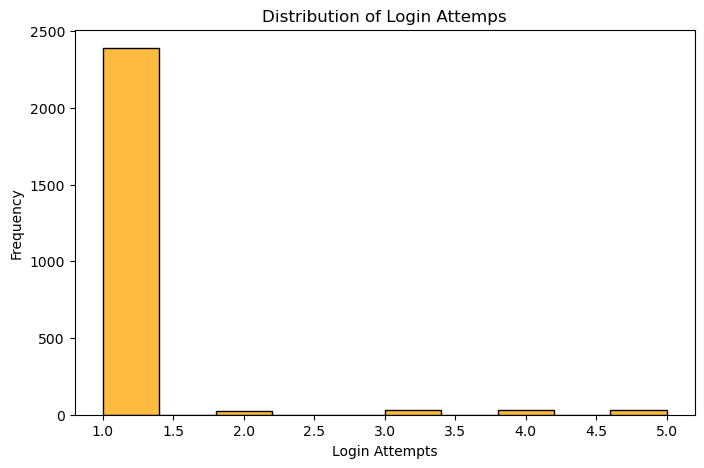

In [16]:
#Login attempts distribution
plt.figure(figsize=(8,5))
sb.histplot(bt['LoginAttempts'], bins=10, kde=False, color='orange')
plt.title('Distribution of Login Attemps')
plt.xlabel('Login Attempts')
plt.ylabel('Frequency')
plt.show()

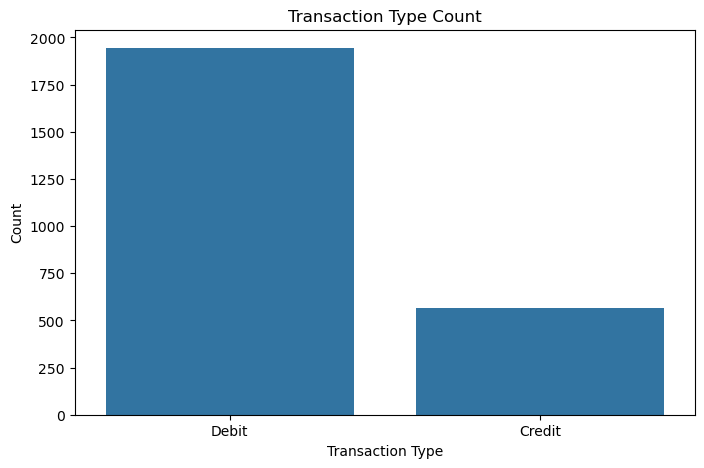

In [17]:
#Transaction Type Count
plt.figure(figsize=(8,5))
sb.countplot(x='TransactionType', data=bt)
plt.title('Transaction Type Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

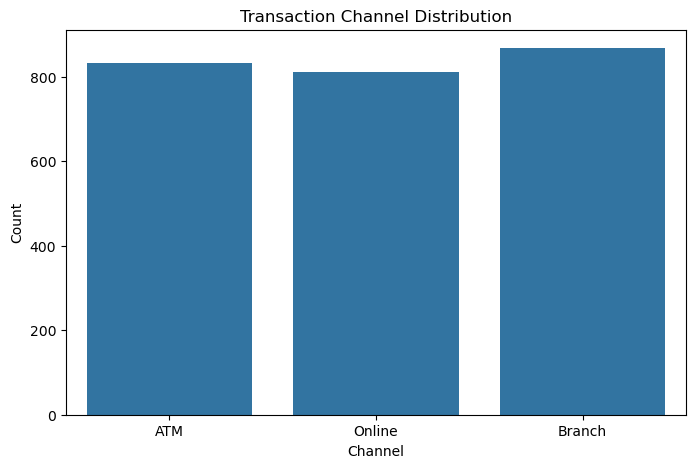

In [18]:
#Channel Count
plt.figure(figsize=(8,5))
sb.countplot(x='Channel', data=bt)
plt.title('Transaction Channel Distribution')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

BIVARIATE/MULTIVARIATE ANALYSIS

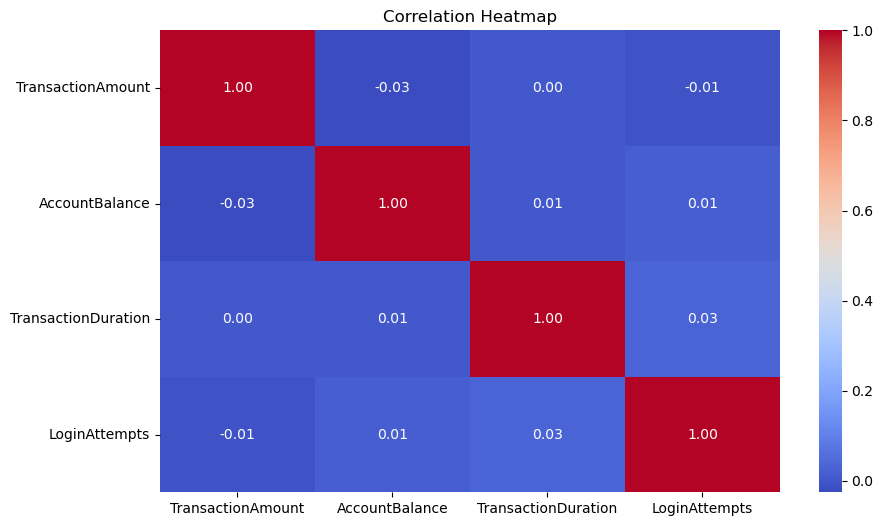

In [19]:
#CORRELATION HEATMAP FOR NUMERICAL ANALYSIS
plt.figure(figsize=(10,6))
correlation_matrix = bt[['TransactionAmount','AccountBalance','TransactionDuration','LoginAttempts']].corr()
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

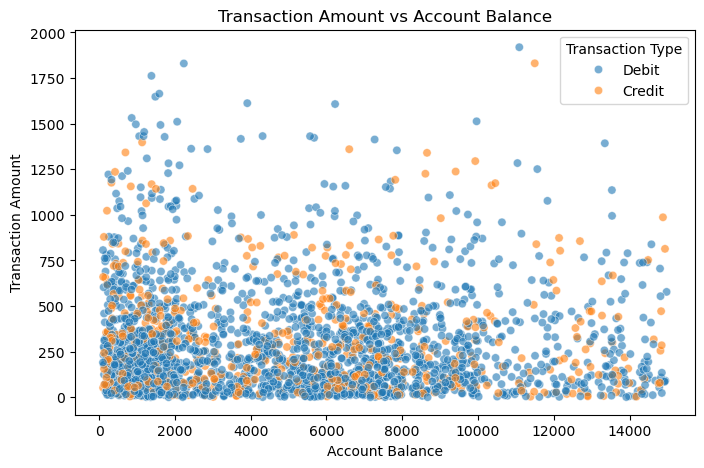

In [20]:
#RELATIONSHIP BETWEEN TRANSACTION AMOUNT AND ACCOUNT BALANCE
plt.figure(figsize=(8,5))
sb.scatterplot(x='AccountBalance',y='TransactionAmount', data=bt, hue='TransactionType',alpha=0.6)
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.show()

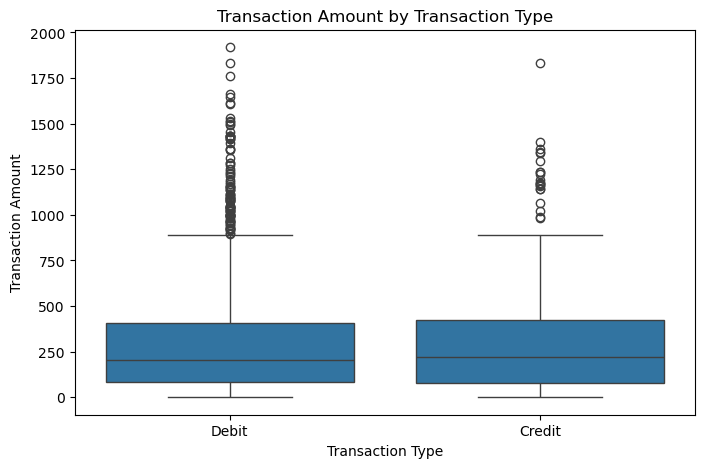

In [21]:
#BOXPLOT OF TRANSACTION AMOUNT BY TRANSACTION TYPE
plt.figure(figsize=(8,5))
sb.boxplot(x='TransactionType', y='TransactionAmount', data=bt)
plt.title('Transaction Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

FRAUD INDICATORS

In [22]:
#SUSPICIOUS HIGH LOGIN ATTEMPTS
high_login_attempts = bt[bt['LoginAttempts']>3]
print(f"Number of Suspicious Transactions (Login Attempts > 3): {len(high_login_attempts)}")
print(high_login_attempts[['TransactionID', 'LoginAttempts', 'TransactionAmount','TransactionDate']])

Number of Suspicious Transactions (Login Attempts > 3): 64
     TransactionID  LoginAttempts  TransactionAmount     TransactionDate
26        TX000027              5             246.93 2023-04-17 16:37:01
91        TX000092              4             223.85 2023-10-02 16:36:10
147       TX000148              5             514.95 2023-04-13 18:37:48
266       TX000267              4              66.90 2023-04-17 16:50:45
274       TX000275              5            1176.28 2023-12-20 16:08:02
...            ...            ...                ...                 ...
2262      TX002263              4              15.81 2023-03-02 18:36:55
2288      TX002289              4             336.01 2023-11-09 18:45:10
2310      TX002311              5             176.52 2023-03-14 17:06:18
2371      TX002372              4              21.23 2023-09-11 16:35:15
2423      TX002424              4             332.06 2023-06-21 16:38:54

[64 rows x 4 columns]


In [23]:
#TRANSACTIONS WITH UNUSUALLY HIGH AMOUNTS
high_amount_threshold = bt['TransactionAmount'].quantile(0.95)
unusual_transactions = bt[bt['TransactionAmount'] > high_amount_threshold]
print(f"Number of unusually high transactions: {len(unusual_transactions)}")
print(unusual_transactions[['TransactionID', 'TransactionAmount','TransactionDate']])

Number of unusually high transactions: 126
     TransactionID  TransactionAmount     TransactionDate
74        TX000075            1212.51 2023-10-04 16:36:29
82        TX000083             922.55 2023-01-23 16:32:48
85        TX000086            1340.19 2023-09-29 17:22:10
110       TX000111            1045.22 2023-11-22 16:13:39
129       TX000130            1036.66 2023-07-11 16:39:53
...            ...                ...                 ...
2403      TX002404            1493.00 2023-06-07 17:05:41
2414      TX002415            1664.33 2023-09-25 17:11:19
2428      TX002429             981.90 2023-11-28 16:17:46
2436      TX002437             942.70 2023-11-06 16:24:45
2466      TX002467             883.92 2023-11-03 16:08:00

[126 rows x 3 columns]


In [24]:
bt.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

TRANSACTION PATTERNS

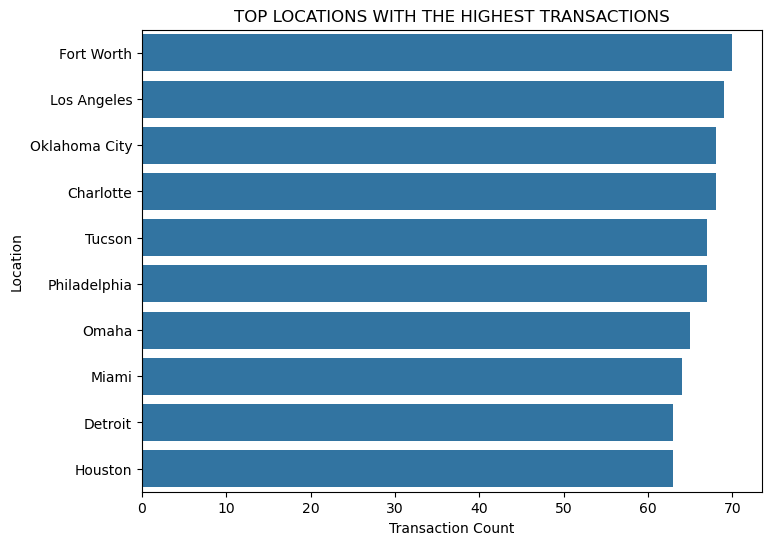

In [30]:
#MOST COMMON LOCATIONS FOR TRANSACTIONS
top_locations = bt['Location'].value_counts().head(10)
plt.figure(figsize=(8,6))
sb.barplot(x=top_locations.values, y=top_locations.index)
plt.title('TOP LOCATIONS WITH THE HIGHEST TRANSACTIONS')
plt.xlabel('Transaction Count')
plt.ylabel('Location')
plt.show()

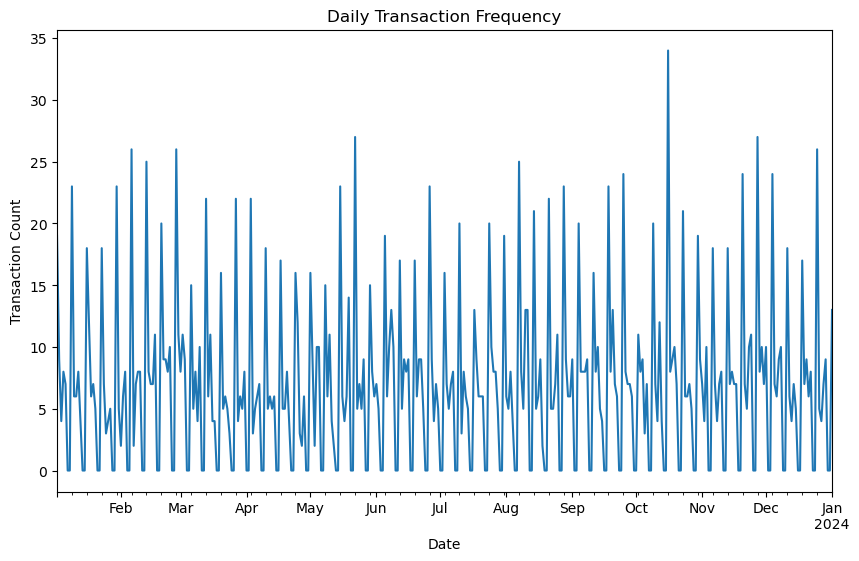

In [32]:
bt['TransactionDate'] = pd.to_datetime(bt['TransactionDate'])
bt.set_index('TransactionDate', inplace=True)
#TIME SERIES ANALYSIS
plt.figure(figsize=(10,6))
bt.resample('D')['TransactionID'].count().plot()
plt.title('Daily Transaction Frequency')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

In [34]:
bt.reset_index(inplace=True)

In [35]:
bt.columns

Index(['TransactionDate', 'TransactionID', 'AccountID', 'TransactionAmount',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

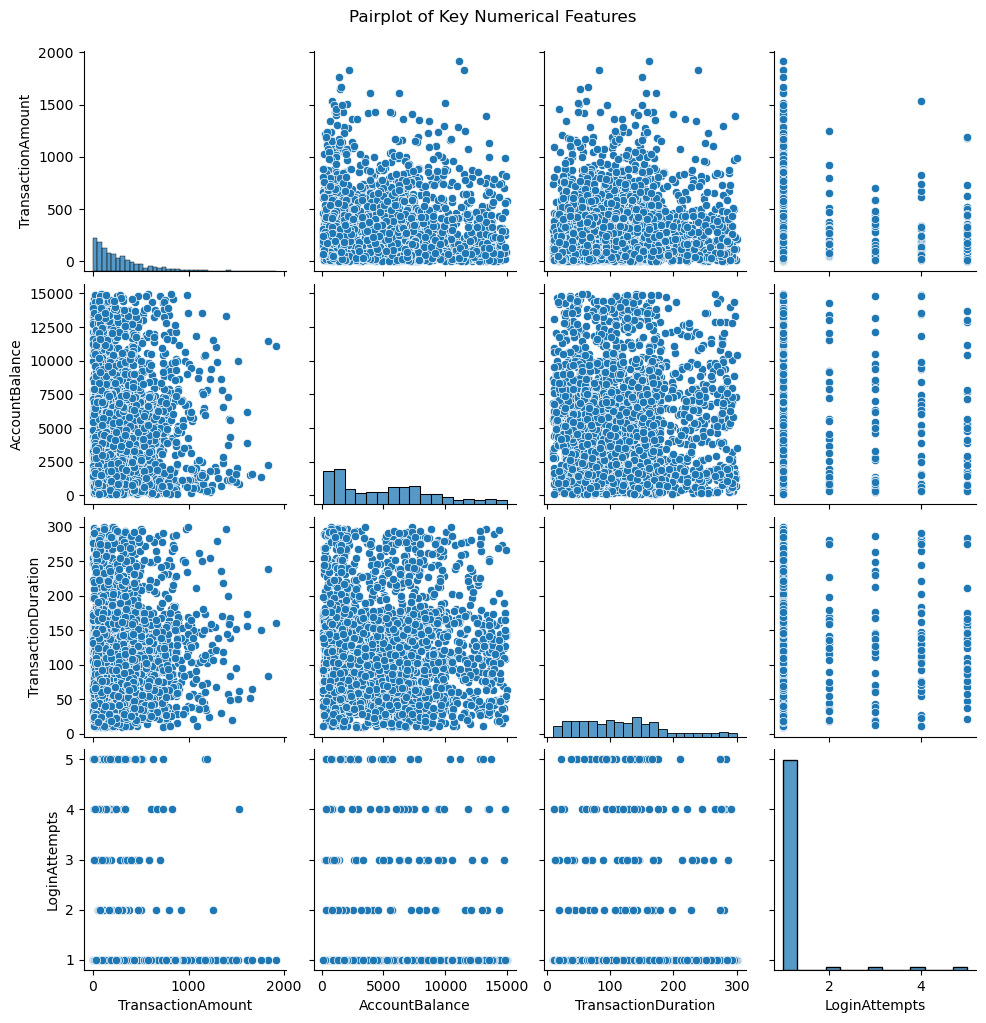

In [36]:
#PAIRPLOT FOR NUMERICAL FEATURES
sb.pairplot(bt[['TransactionAmount','AccountBalance','TransactionDuration','LoginAttempts']])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()